In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

from langgraph.graph import StateGraph,START,END,add_messages
from langchain_core.messages import HumanMessage,AIMessage
from typing import TypedDict,Annotated


In [3]:
class StateMessage(TypedDict):
    messages:Annotated[list,add_messages]

In [4]:
model=ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [5]:
def generate(state:StateMessage):
    print("---state---")
    print(state["messages"])
    return {"messages":model.invoke(state["messages"])}

In [6]:
def user_input(state:StateMessage):
    last_message=state['messages'][-1]
    
    print(last_message)
    user_i=input("Do you want to post the content (yes/no)?")

    if user_i=="yes":
        return "post"
    else:
        return "feedback"
    

In [7]:
def post(state:StateMessage):
    print("Posting to linkedin...")

    print(state["messages"][-1])

In [8]:
def get_feedback(state:StateMessage):

    feedback=input("what should need to improve")

    return {
        "messages":HumanMessage(content=feedback)
    }

In [9]:
graph=StateGraph(StateMessage)

graph.add_node("generate",generate)
graph.add_node("post",post)
graph.add_node("feedback",get_feedback)
# graph.add_node("user_input",user_input)


graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",user_input,{"post":"post","feedback":"feedback"})
graph.add_edge("post",END)
graph.add_edge("feedback","generate")
workflow=graph.compile()

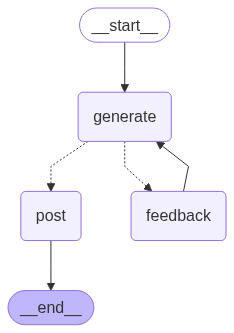

In [10]:
workflow

In [11]:
workflow.invoke({"messages":"Write me a LinkedIn post on AI Agents taking over content creation with good hashtags"})

---state---
[HumanMessage(content='Write me a LinkedIn post on AI Agents taking over content creation with good hashtags', additional_kwargs={}, response_metadata={}, id='ad02d200-b585-46ed-9b3d-52c1b35958f7')]
content="**Option 1 (Focus on opportunity):**\n\nAI agents are revolutionizing content creation! 🚀  No longer a futuristic fantasy, AI tools are assisting (and in some cases, leading) the charge in generating high-quality content at scale.  This isn't about replacing human creativity, but augmenting it.  Think faster workflows, exploring new creative avenues, and tackling repetitive tasks.  Are you leveraging AI to boost your content game? Share your experiences! #AI #ArtificialIntelligence #ContentCreation #ContentMarketing #AIContent #Automation #Productivity #FutureOfWork #DigitalMarketing\n\n\n**Option 2 (Focus on the impact):**\n\nThe content creation landscape is shifting.  AI agents are rapidly becoming indispensable tools, impacting everything from blog posts and social 

{'messages': [HumanMessage(content='Write me a LinkedIn post on AI Agents taking over content creation with good hashtags', additional_kwargs={}, response_metadata={}, id='ad02d200-b585-46ed-9b3d-52c1b35958f7'),
  AIMessage(content="**Option 1 (Focus on opportunity):**\n\nAI agents are revolutionizing content creation! 🚀  No longer a futuristic fantasy, AI tools are assisting (and in some cases, leading) the charge in generating high-quality content at scale.  This isn't about replacing human creativity, but augmenting it.  Think faster workflows, exploring new creative avenues, and tackling repetitive tasks.  Are you leveraging AI to boost your content game? Share your experiences! #AI #ArtificialIntelligence #ContentCreation #ContentMarketing #AIContent #Automation #Productivity #FutureOfWork #DigitalMarketing\n\n\n**Option 2 (Focus on the impact):**\n\nThe content creation landscape is shifting.  AI agents are rapidly becoming indispensable tools, impacting everything from blog post